In [1]:
import os
import re
import subprocess
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceMatrix
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

In [4]:
command = ['FastTree', '-gtr', '-nt', '-cat', '20', '-makematrix', "biodb.fa.aln", '>', "Output.txt"]
" ".join(command)

'FastTree -gtr -nt -cat 20 -makematrix biodb.fa.aln > Output.txt'

In [5]:
def calculate_pairwise_distances(filename):
    # Define the FastTree command to generate a distance matrix
    print("Input filename: ", filename)
    out_filename = os.path.splitext(os.path.basename(filename))[0] + "_matrix.txt"
    print("Output filename: ", out_filename)
    command = ['FastTree', '-gtr', '-nt', '-cat', '20', '-makematrix', filename, '>', out_filename]
    

    # Execute the command
    subprocess.run(" ".join(command), shell=True)

    # Read the distance matrix from the output file
    names = []
    distances = []
    with open(out_filename, 'r') as matrix_file:
        lines = matrix_file.readlines()[1:]  # Skip the header line
        for i, line in enumerate(lines):
            temp_data = line.strip().split()
            names.append(temp_data[0])
            distances.append(list(map(float, temp_data[1:])))

    return (names, distances)

# Specify the path to your FASTA file
fasta_file = 'bioB.fa.aln'

# Calculate pairwise distances
names, distances = calculate_pairwise_distances(fasta_file)

Input filename:  bioB.fa.aln
Output filename:  bioB.fa_matrix.txt


In [6]:
print(names)

['AGFR01000001.1_Commensalibac_01860', 'BM11bin3NODE_1_length_643685_01394', 'BOMJAN3_00267', 'KB899333.1_Saccharibacter_fl_00453', 'NC_011365.1_Gluconacetobacte_03481', 'NC_015186.1_Acidiphilium_mul_02131', 'NC_016027.1_Komagataeibacter_00032', 'NZ_AP014690.1_Asaia_bogorens_00928', 'NZ_CP004373.1_Gluconobacter__02199', 'NZ_CP014681.1_Kozakia_balien_01490', 'NZ_CP014689.1_Gluconobacter__00860', 'NZ_CP014691.1_Neoasaia_chian_00724', 'NZ_CP018193.1_Granulibacter__00522', 'NZ_CP019875.1_Komagataeibact_02999', 'NZ_CP021467.1_Komagataeibact_00031', 'NZ_CP021524.1_Acetobacter_as_00072', 'NZ_CP022374.1_Acetobacter_or_01236', 'NZ_CP032485.1_Neokomagataea__00443', 'NZ_CP036404.1_Komagataeibact_00031', 'NZ_CP038141.1_Swingsia_samui_01808', 'NZ_CP038143.1_Oecophyllibact_00031', 'NZ_CP039846.1_Acetobacter_pa_00074', 'NZ_CP042808.1_Acetobacter_or_01055', 'NZ_CP046393.1_Commensalibact_01592', 'NZ_CP047652.1_Bombella_sp._K_00939', 'NZ_CP050139.1_Komagataeibact_01040', 'NZ_CP053708.1_Lichenicola_cl_00

In [7]:
print(distances)

[[0.0, 0.564291, 0.505266, 0.553004, 0.544876, 0.670838, 0.540513, 0.533106, 0.524429, 0.518547, 0.524429, 0.557499, 0.609974, 0.523585, 0.545232, 0.42389, 0.444659, 0.490692, 0.529713, 0.436991, 0.585046, 0.456235, 0.462091, 0.304484, 0.488633, 0.55368, 0.570704, 0.541663, 0.521184, 0.517987, 0.530928, 0.566569, 0.530928, 0.456137, 0.548537, 0.559756, 0.522276, 0.513723, 0.5116], [0.564291, 0.0, 0.427788, 0.44084, 0.40199, 0.444659, 0.420304, 0.345611, 0.376972, 0.368516, 0.378674, 0.365382, 0.442729, 0.374823, 0.394954, 0.44084, 0.438926, 0.448284, 0.409431, 0.433469, 0.42617, 0.446613, 0.42754, 0.548537, 0.503581, 0.420304, 0.393321, 0.48249, 0.412973, 0.397663, 0.352144, 0.425942, 0.429639, 0.420175, 0.431494, 0.454123, 0.438956, 0.422546, 0.431637], [0.505266, 0.427788, 0.0, 0.37904, 0.416248, 0.490859, 0.448547, 0.420431, 0.393465, 0.398781, 0.395233, 0.411334, 0.486279, 0.429316, 0.425611, 0.429279, 0.444734, 0.411334, 0.444684, 0.400562, 0.342856, 0.433113, 0.42167, 0.464356, 0

In [8]:
distance_matrix = [distances[i][:i+1] for i in range(len(distances))]
print(distance_matrix)

[[0.0], [0.564291, 0.0], [0.505266, 0.427788, 0.0], [0.553004, 0.44084, 0.37904, 0.0], [0.544876, 0.40199, 0.416248, 0.508346, 0.0], [0.670838, 0.444659, 0.490859, 0.55368, 0.328217, 0.0], [0.540513, 0.420304, 0.448547, 0.489717, 0.240276, 0.384347, 0.0], [0.533106, 0.345611, 0.420431, 0.469145, 0.293104, 0.40187, 0.285791, 0.0], [0.524429, 0.376972, 0.393465, 0.433469, 0.300941, 0.394672, 0.322057, 0.279805, 0.0], [0.518547, 0.368516, 0.398781, 0.455803, 0.328237, 0.397402, 0.344779, 0.229, 0.32285, 0.0], [0.524429, 0.378674, 0.395233, 0.417144, 0.300941, 0.384002, 0.330178, 0.287313, 0.080252, 0.311855, 0.0], [0.557499, 0.365382, 0.411334, 0.453916, 0.277671, 0.398262, 0.312426, 0.215847, 0.310297, 0.216614, 0.304099, 0.0], [0.609974, 0.442729, 0.486279, 0.530948, 0.346159, 0.390096, 0.372691, 0.400439, 0.396871, 0.41037, 0.395094, 0.409431, 0.0], [0.523585, 0.374823, 0.429316, 0.486279, 0.215677, 0.362635, 0.127406, 0.265569, 0.294969, 0.319187, 0.301309, 0.279352, 0.369781, 0.0], [

In [9]:
distance_matrix = DistanceMatrix(names, matrix=distance_matrix)
print(distance_matrix)
constructor = DistanceTreeConstructor()
upgmatree = constructor.upgma(distance_matrix)

AGFR01000001.1_Commensalibac_01860	0
BM11bin3NODE_1_length_643685_01394	0.564291	0
BOMJAN3_00267	0.505266	0.427788	0
KB899333.1_Saccharibacter_fl_00453	0.553004	0.44084	0.37904	0
NC_011365.1_Gluconacetobacte_03481	0.544876	0.40199	0.416248	0.508346	0
NC_015186.1_Acidiphilium_mul_02131	0.670838	0.444659	0.490859	0.55368	0.328217	0
NC_016027.1_Komagataeibacter_00032	0.540513	0.420304	0.448547	0.489717	0.240276	0.384347	0
NZ_AP014690.1_Asaia_bogorens_00928	0.533106	0.345611	0.420431	0.469145	0.293104	0.40187	0.285791	0
NZ_CP004373.1_Gluconobacter__02199	0.524429	0.376972	0.393465	0.433469	0.300941	0.394672	0.322057	0.279805	0
NZ_CP014681.1_Kozakia_balien_01490	0.518547	0.368516	0.398781	0.455803	0.328237	0.397402	0.344779	0.229	0.32285	0
NZ_CP014689.1_Gluconobacter__00860	0.524429	0.378674	0.395233	0.417144	0.300941	0.384002	0.330178	0.287313	0.080252	0.311855	0
NZ_CP014691.1_Neoasaia_chian_00724	0.557499	0.365382	0.411334	0.453916	0.277671	0.398262	0.312426	0.215847	0.310297	0.216614	0.3

In [11]:
Phylo.draw_ascii(upgmatree)

     ___________________________ NZ_CP060244.1_Entomobacter_b_00382
    |
   ,|    _______________________ NZ_CP047652.1_Bombella_sp._K_00939
   ||   |
   ||   |   ____________________ NZ_CP038143.1_Oecophyllibact_00031
   ||___|  |
   |    |  |        ______________ NZ_WNIJ01000001.1_Bombella_s_01007
   |    |  |       |
   |    |__|   ____|     _________ NZ_PDLY01000001.1_Bombella_m_00732
   |       |  |    |    |
   |       |  |    |____|      ___ NZ_NWUS01000001.1_Bombella_f_00255
   |       |  |         |  ___|
   |       |  |         |_|   |___ NZ_JATM01000005.1_Bombella_i_00824
   |       |__|           |
   |          |           |_______ NZ_JAGJTM010000001.1_Bombell_00464
   |          |
   |          |                  ___ WVHQ01000001.1_Saccharibacte_00656
   |          |  _______________|
   |          | |               |___ KB899333.1_Saccharibacter_fl_00453
   |          |_|
   |            |  _________________ WVHO01000001.1_Saccharibacte_01095
   |            |_|
   |  

In [12]:
from Bio import Phylo
import matplotlib.pyplot as plt

# Assuming upgmatree is your Phylo tree object

# Create a matplotlib figure and draw the tree on it
fig, ax = plt.subplots(figsize=(20, 20))  # You can adjust the figsize as needed
Phylo.draw(upgmatree, do_show=False, axes=ax)

# Save the figure as an image
output_file = "tree.png"
plt.savefig(output_file, format="png")
plt.close()  # Close the figure to release resources
print(f"Tree saved as an image: {output_file}")


Tree saved as an image: tree.png


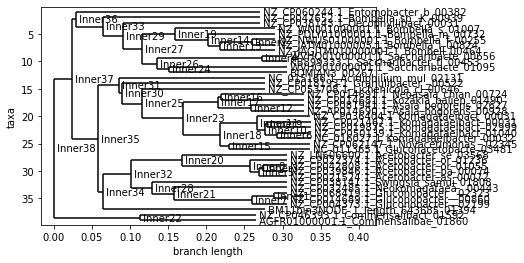

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt

Phylo.draw(upgmatree)
plt.savefig("tree.png")

In [15]:
print(names)

['AGFR01000001.1_Commensalibac_01860', 'BM11bin3NODE_1_length_643685_01394', 'BOMJAN3_00267', 'KB899333.1_Saccharibacter_fl_00453', 'NC_011365.1_Gluconacetobacte_03481', 'NC_015186.1_Acidiphilium_mul_02131', 'NC_016027.1_Komagataeibacter_00032', 'NZ_AP014690.1_Asaia_bogorens_00928', 'NZ_CP004373.1_Gluconobacter__02199', 'NZ_CP014681.1_Kozakia_balien_01490', 'NZ_CP014689.1_Gluconobacter__00860', 'NZ_CP014691.1_Neoasaia_chian_00724', 'NZ_CP018193.1_Granulibacter__00522', 'NZ_CP019875.1_Komagataeibact_02999', 'NZ_CP021467.1_Komagataeibact_00031', 'NZ_CP021524.1_Acetobacter_as_00072', 'NZ_CP022374.1_Acetobacter_or_01236', 'NZ_CP032485.1_Neokomagataea__00443', 'NZ_CP036404.1_Komagataeibact_00031', 'NZ_CP038141.1_Swingsia_samui_01808', 'NZ_CP038143.1_Oecophyllibact_00031', 'NZ_CP039846.1_Acetobacter_pa_00074', 'NZ_CP042808.1_Acetobacter_or_01055', 'NZ_CP046393.1_Commensalibact_01592', 'NZ_CP047652.1_Bombella_sp._K_00939', 'NZ_CP050139.1_Komagataeibact_01040', 'NZ_CP053708.1_Lichenicola_cl_00

In [16]:
def assign_subgroup(names):
    subgroups = {}
    for name in names:
        # Use regular expression to extract the subgroup identifier
        match = re.search(r'_([A-Za-z]+)_', name)
        if match:
            subgroup = match.group(1)
            matched_subgroup = None
            for key in subgroups:
                if subgroup[:-3] in key:
                    matched_subgroup = key
                    break
            if matched_subgroup:
                subgroups[matched_subgroup].append(name)
            else:
                subgroups.setdefault(subgroup, []).append(name)

    return subgroups

In [17]:
assign_subgroup(names)

{'Commensalibac': ['AGFR01000001.1_Commensalibac_01860',
  'NZ_CP046393.1_Commensalibact_01592'],
 'length': ['BM11bin3NODE_1_length_643685_01394'],
 'Saccharibacter': ['KB899333.1_Saccharibacter_fl_00453',
  'WVHO01000001.1_Saccharibacte_01095',
  'WVHQ01000001.1_Saccharibacte_00656'],
 'Gluconacetobacte': ['NC_011365.1_Gluconacetobacte_03481'],
 'Acidiphilium': ['NC_015186.1_Acidiphilium_mul_02131'],
 'Komagataeibacter': ['NC_016027.1_Komagataeibacter_00032',
  'NZ_CP019875.1_Komagataeibact_02999',
  'NZ_CP021467.1_Komagataeibact_00031',
  'NZ_CP036404.1_Komagataeibact_00031',
  'NZ_CP050139.1_Komagataeibact_01040'],
 'Asaia': ['NZ_AP014690.1_Asaia_bogorens_00928',
  'NZ_CP081941.1_Asaia_bogorens_02627'],
 'Gluconobacter': ['NZ_CP004373.1_Gluconobacter__02199',
  'NZ_CP014689.1_Gluconobacter__00860',
  'NZ_CP068419.1_Gluconobacter__02323'],
 'Kozakia': ['NZ_CP014681.1_Kozakia_balien_01490'],
 'Neoasaia': ['NZ_CP014691.1_Neoasaia_chian_00724'],
 'Granulibacter': ['NZ_CP018193.1_Granul